In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
r_seed = 2020
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [2]:
df = pd.read_csv("datasets/iris.csv")


In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2022)

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

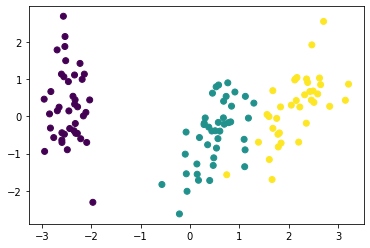

In [9]:
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_train)
plt.show()

In [10]:
# 분류
#예측
# confusion matrix

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC()
svc.fit(X_train_pca,y_train)

SVC()

In [13]:
X_test_pca = pca.transform(X_test)

C:\Users\027\anaconda3\envs\myml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(X_train_pca,y_train)

LogisticRegression()

In [16]:
y_pred = svc.predict(X_test_pca)

In [17]:
y_pred_lg= lr.predict(X_test_pca)

In [18]:
y_pred_lg

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
y_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])